<a href="https://colab.research.google.com/github/meerilahi/algoTrading/blob/main/new_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing and Importing Libraries**

In [2]:
!pip install alpha_vantage

In [161]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
%matplotlib inline

**Fetching Data**

In [137]:
API_KEY = "XM0ZE0M05HEDFVTP"
ts = TimeSeries(key = API_KEY, output_format = 'pandas')
data = ts.get_daily(symbol = 'MSFT', outputsize = 'full')[0]

**Making Time Lags**

In [157]:
df = data.iloc[:,3:4]
df.columns = ["Close"]
df.index.rename("Date", inplace = True)
df = df[::-1]
for i in range(1,6):
  df[f'L{i}'] = df['Close'].shift(i)
df['Close_diff'] = df['Close'] - df['L1']
df['Signal'] = df['Close_diff'].apply(lambda x: 1 if x > 0 else 0)
df.dropna(inplace = True)
df

,Close,L1,L2,L3,L4,L5,Close_diff,Signal
Date,,,,,,,,
1999-11-08,89.94,91.56,91.75,92.00,92.56,92.37,-1.62,0
1999-11-09,88.87,89.94,91.56,91.75,92.00,92.56,-1.07,0
1999-11-10,87.12,88.87,89.94,91.56,91.75,92.00,-1.75,0
1999-11-11,89.62,87.12,88.87,89.94,91.56,91.75,2.50,1
1999-11-12,89.19,89.62,87.12,88.87,89.94,91.56,-0.43,0
...,...,...,...,...,...,...,...,...
2025-02-26,399.73,397.90,404.00,408.21,416.13,414.77,1.83,1
2025-02-27,392.53,399.73,397.90,404.00,408.21,416.13,-7.20,0
2025-02-28,396.99,392.53,399.73,397.90,404.00,408.21,4.46,1


**Visualizing Data**

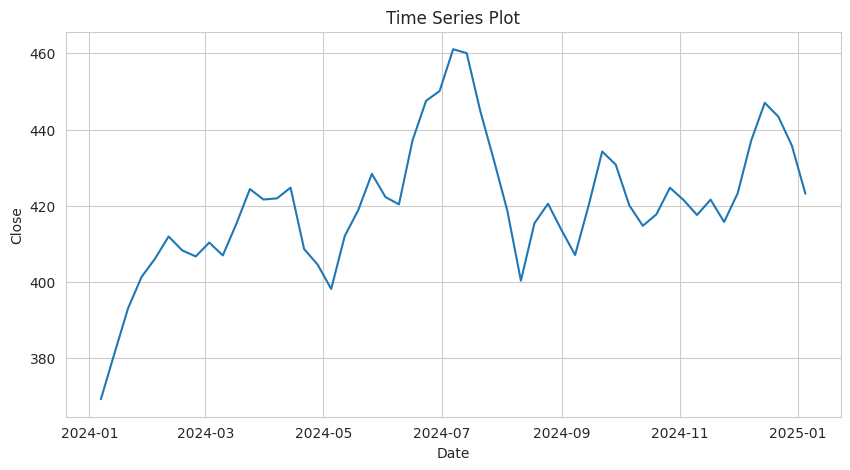

In [102]:
temp = df.loc["2024-01-01":"2025-01-01"].resample("W").mean()
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(x=temp.index, y=temp["Close"], marker=None)
plt.title("Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

**Test Train Split**

In [159]:
split_ratio = 0.8
split_index = int(len(df) * split_ratio)
train = df.iloc[:split_index]
test = df.iloc[split_index:]
X_train = train.drop(["Close", "Close_diff"], axis=1)
y_train = train["Close_diff"]
X_test = test.drop(["Close", "Close_diff"], axis=1)
y_test = test["Close_diff"]
y_test2 = test["L1"] + y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5094, 6), (5094,), (1274, 6), (1274,))

**Linear Regression**

In [155]:
r = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred2 = test['L1'].values + y_pred_diff
mse = mean_squared_error(y_test, y_pred_diff)
r2 = r2_score(y_test, y_pred_diff)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 25.442089774978733
R-squared: 0.0014834554313372106


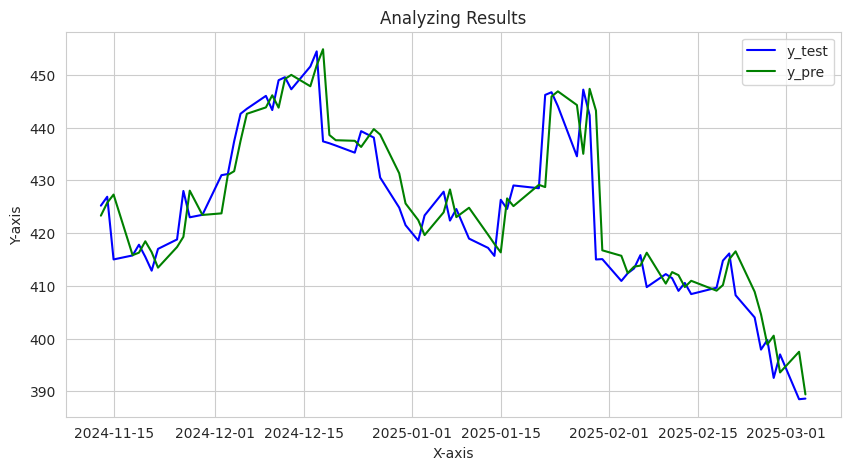

In [149]:
plt.figure(figsize=(10, 5))

plt.plot(y_test2[1200:].index, y_test2[1200:], label="y_test", color="blue")
# plt.plot(y_train.index, y_train, label="Train", color="red")
plt.plot(y_test2[1200:].index, y_pred2[1200:], label="y_pre", color="green")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Analyzing Results")
plt.legend()
plt.show()


**Logistic Regression**

In [162]:
X_train = train.drop(["Close", "Close_diff", "Signal"], axis=1)
y_train = train["Signal"]
X_test = test.drop(["Close", "Close_diff", "Signal"], axis=1)
y_test = test["Signal"]
logR = LogisticRegression()
logR.fit(X_train, y_train)
y_pred = logR.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      0.03      0.06       607
           1       0.52      0.97      0.68       667

    accuracy                           0.52      1274
   macro avg       0.52      0.50      0.37      1274
weighted avg       0.52      0.52      0.38      1274

